In [142]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [143]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
tf.random.set_seed(42)

In [144]:
def plot_history(history):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].plot(history.history['accuracy'], label='accuracy')
    axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_ylim([0.1, 1])
    axs[0].legend(loc='lower right')

    axs[1].plot(history.history['loss'], label='loss')
    axs[1].plot(history.history['val_loss'], label='val_loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend(loc='upper right')

    axs[2].text(0.1, 0.5, f'Final Train Acc: {history.history["accuracy"][-1]:.4f}\nFinal Val Acc: {history.history["val_accuracy"][-1]:.4f}', fontsize=12)
    axs[2].axis('off')

    plt.show()

In [145]:
def eval_model(model, x_test, y_test):
    y_prob = model.predict(x_test, batch_size=128, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)

    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [146]:
seqential_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_1.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_1, y_train_1 = x_train[:1000], y_train[:1000]
x_test_1 , y_test_1 = x_test[:200], y_test[:200]

x_tr_1, x_val_1, y_tr_1, y_val_1 = train_test_split(
    x_train_1, y_train_1, test_size=0.2, random_state=42, stratify=y_train_1
)

history_1 = seqential_model_1.fit(x_tr_1, y_tr_1,
                              epochs=50,
                              batch_size = 32,
                              validation_data=(x_val_1, y_val_1),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 2s - 63ms/step - accuracy: 0.4812 - loss: 1.6441 - val_accuracy: 0.7300 - val_loss: 1.0025
Epoch 2/50
25/25 - 0s - 14ms/step - accuracy: 0.8200 - loss: 0.6748 - val_accuracy: 0.8350 - val_loss: 0.6141
Epoch 3/50
25/25 - 0s - 14ms/step - accuracy: 0.9025 - loss: 0.4015 - val_accuracy: 0.8750 - val_loss: 0.4990
Epoch 4/50
25/25 - 0s - 14ms/step - accuracy: 0.9375 - loss: 0.2756 - val_accuracy: 0.8850 - val_loss: 0.4615
Epoch 5/50
25/25 - 0s - 15ms/step - accuracy: 0.9525 - loss: 0.1952 - val_accuracy: 0.8900 - val_loss: 0.4568
Epoch 6/50
25/25 - 0s - 15ms/step - accuracy: 0.9762 - loss: 0.1369 - val_accuracy: 0.8850 - val_loss: 0.4647
Epoch 7/50
25/25 - 0s - 14ms/step - accuracy: 0.9900 - loss: 0.0953 - val_accuracy: 0.8800 - val_loss: 0.4780
Epoch 8/50
25/25 - 0s - 14ms/step - accuracy: 0.9937 - loss: 0.0672 - val_accuracy: 0.8650 - val_loss: 0.4888
Epoch 9/50
25/25 - 0s - 14ms/step - accuracy: 0.9975 - loss: 0.0484 - val_accuracy: 0.8700 - val_loss: 0.4974
Epoch 10/50
25/25 - 0

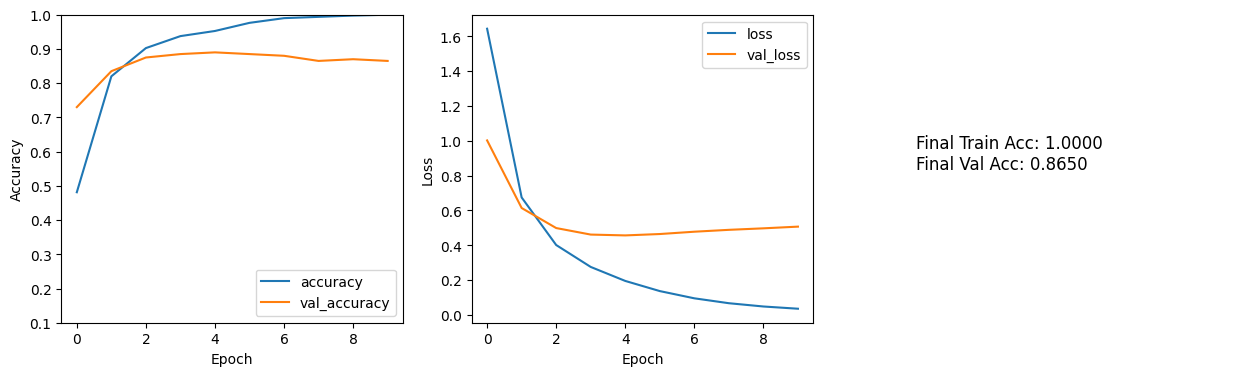

In [147]:
plot_history(history_1)

In [148]:
eval_model(seqential_model_1, x_test_1, y_test_1)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     1.0000    1.0000    1.0000        28
           2     0.6875    0.6875    0.6875        16
           3     0.9231    0.7500    0.8276        16
           4     0.9200    0.8214    0.8679        28
           5     0.9048    0.9500    0.9268        20
           6     0.9000    0.9000    0.9000        20
           7     0.8214    0.9583    0.8846        24
           8     1.0000    1.0000    1.0000        10
           9     0.8182    0.8571    0.8372        21

    accuracy                         0.8950       200
   macro avg     0.8975    0.8924    0.8932       200
weighted avg     0.8976    0.8950    0.8945       200

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 11  1  1  0  1  2  0  0]
 [ 0  0  2 12  0  2  0  0  0  0]
 [ 0  0  0  0 23  0  1  1  0  3]
 [ 0  0  0  0  1 19  0  0  0  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0

In [149]:
cifar = tf.keras.datasets.cifar10
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar.load_data()


In [150]:
seqential_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_2.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_2, y_train_2 = cifar_x_train[:5000].astype("float32")/255.0, cifar_y_train[:5000].ravel()
x_test_2,  y_test_2  = cifar_x_test[:1000].astype("float32")/255.0,  cifar_y_test[:1000].ravel()

x_tr_2, x_val_2, y_tr_2, y_val_2 = train_test_split(
    x_train_2, y_train_2, test_size=0.2, random_state=42, stratify=y_train_2
)

history_2 = seqential_model_2.fit(x_tr_2, y_tr_2,
                              epochs=50,
                              batch_size = 128,
                              validation_data=(x_val_2, y_val_2),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 - 2s - 63ms/step - accuracy: 0.1517 - loss: 3.4473 - val_accuracy: 0.1380 - val_loss: 2.3338
Epoch 2/50
32/32 - 1s - 20ms/step - accuracy: 0.2673 - loss: 2.0091 - val_accuracy: 0.2330 - val_loss: 2.1092
Epoch 3/50
32/32 - 1s - 20ms/step - accuracy: 0.3203 - loss: 1.8884 - val_accuracy: 0.2600 - val_loss: 2.1083
Epoch 4/50
32/32 - 1s - 20ms/step - accuracy: 0.3478 - loss: 1.8146 - val_accuracy: 0.2620 - val_loss: 2.1578
Epoch 5/50
32/32 - 1s - 26ms/step - accuracy: 0.3695 - loss: 1.7537 - val_accuracy: 0.2860 - val_loss: 2.1029
Epoch 6/50
32/32 - 1s - 20ms/step - accuracy: 0.3875 - loss: 1.6935 - val_accuracy: 0.2850 - val_loss: 2.0432
Epoch 7/50
32/32 - 1s - 19ms/step - accuracy: 0.4130 - loss: 1.6304 - val_accuracy: 0.3210 - val_loss: 1.9658
Epoch 8/50
32/32 - 1s - 19ms/step - accuracy: 0.4315 - loss: 1.5718 - val_accuracy: 0.3240 - val_loss: 1.9423
Epoch 9/50
32/32 - 1s - 18ms/step - accuracy: 0.4512 - loss: 1.5199 - val_accuracy: 0.3210 - val_loss: 1.9861
Epoch 10/50
32/32 - 1

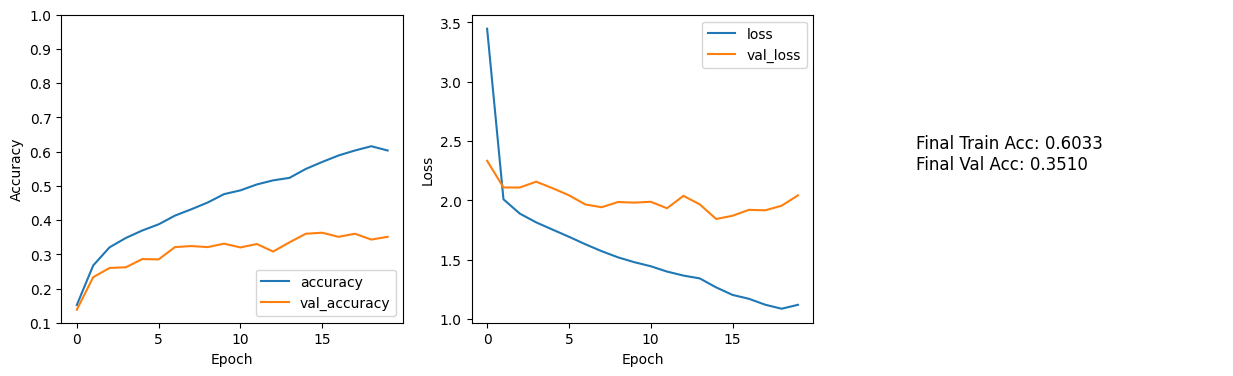

In [151]:
plot_history(history_2)

In [152]:
eval_model(seqential_model_2, x_test_2, y_test_2)

              precision    recall  f1-score   support

           0     0.3741    0.5340    0.4400       103
           1     0.5185    0.4719    0.4941        89
           2     0.2043    0.4800    0.2866       100
           3     0.2308    0.1748    0.1989       103
           4     0.3333    0.1222    0.1789        90
           5     0.2250    0.3140    0.2621        86
           6     0.4000    0.1250    0.1905       112
           7     0.4211    0.3922    0.4061       102
           8     0.6386    0.5000    0.5608       106
           9     0.4409    0.3761    0.4059       109

    accuracy                         0.3490      1000
   macro avg     0.3786    0.3490    0.3424      1000
weighted avg     0.3817    0.3490    0.3435      1000

[[55  0 13  4  2  2  3  6 12  6]
 [ 5 42  8  1  0  8  0  7  3 15]
 [20  1 48 12  4  4  2  4  3  2]
 [ 9  5 28 18  2 28  5  5  1  2]
 [11  2 37  2 11 10  4 10  2  1]
 [ 2  3 17 18  4 27  3  9  1  2]
 [ 3  2 52 13  4 17 14  4  0  3]
 [ 7  1 21

In [153]:
seqential_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_3, y_train_3 = x_train[:1000], y_train[:1000]
x_test_3 , y_test_3 = x_test[:200], y_test[:200]

x_tr_3, x_val_3, y_tr_3, y_val_3 = train_test_split(
    x_train_3, y_train_3, test_size=0.2, random_state=42, stratify=y_train_3
)

history_3 = seqential_model_3.fit(x_tr_3, y_tr_3,
                              epochs=50,
                              batch_size = 32,
                              validation_data=(x_val_3, y_val_3),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 2s - 67ms/step - accuracy: 0.3963 - loss: 1.7568 - val_accuracy: 0.7250 - val_loss: 1.0149
Epoch 2/50
25/25 - 0s - 16ms/step - accuracy: 0.7625 - loss: 0.8270 - val_accuracy: 0.8050 - val_loss: 0.6915
Epoch 3/50
25/25 - 0s - 15ms/step - accuracy: 0.8462 - loss: 0.5678 - val_accuracy: 0.8450 - val_loss: 0.5655
Epoch 4/50
25/25 - 0s - 16ms/step - accuracy: 0.8700 - loss: 0.4414 - val_accuracy: 0.8400 - val_loss: 0.5186
Epoch 5/50
25/25 - 0s - 16ms/step - accuracy: 0.8963 - loss: 0.3559 - val_accuracy: 0.8700 - val_loss: 0.4945
Epoch 6/50
25/25 - 0s - 15ms/step - accuracy: 0.9175 - loss: 0.3046 - val_accuracy: 0.8700 - val_loss: 0.4568
Epoch 7/50
25/25 - 0s - 15ms/step - accuracy: 0.9362 - loss: 0.2473 - val_accuracy: 0.8900 - val_loss: 0.4458
Epoch 8/50
25/25 - 0s - 15ms/step - accuracy: 0.9262 - loss: 0.2082 - val_accuracy: 0.8750 - val_loss: 0.4443
Epoch 9/50
25/25 - 0s - 15ms/step - accuracy: 0.9525 - loss: 0.1786 - val_accuracy: 0.8900 - val_loss: 0.4402
Epoch 10/50
25/25 - 0

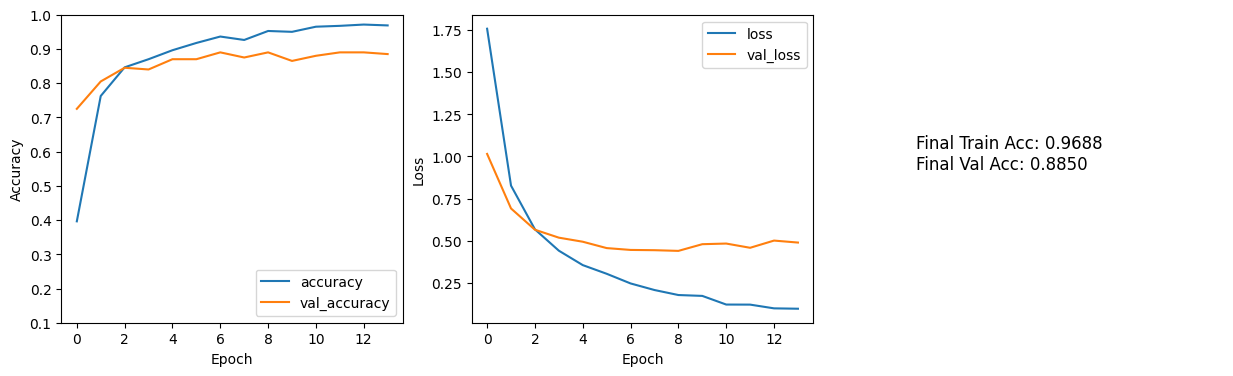

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     1.0000    1.0000    1.0000        28
           2     0.8125    0.8125    0.8125        16
           3     0.8750    0.8750    0.8750        16
           4     0.8519    0.8214    0.8364        28
           5     0.8571    0.9000    0.8780        20
           6     0.9444    0.8500    0.8947        20
           7     0.8519    0.9583    0.9020        24
           8     1.0000    0.9000    0.9474        10
           9     0.8095    0.8095    0.8095        21

    accuracy                         0.8950       200
   macro avg     0.9002    0.8927    0.8956       200
weighted avg     0.8966    0.8950    0.8950       200

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 13  1  1  0  0  1  0  0]
 [ 0  0  1 14  0  1  0  0  0  0]
 [ 0  0  0  0 23  1  0  1  0  3]
 [ 0  0  0  1  1 18  0  0  0  0]
 [ 0  0  2  0  1  0 17  0  0  0]
 [ 0  0  0

In [154]:
plot_history(history_3)
eval_model(seqential_model_3, x_test_3, y_test_3)


In [155]:
mc_passes = 20
probs = []
for _ in range(mc_passes):
    p = seqential_model_3(x_test_3, training=True).numpy() 
    probs.append(p)
probs_mean = np.mean(probs, axis=0)
y_pred = probs_mean.argmax(axis=1)
mc_acc = (y_pred == y_test_3).mean()
print(f" MC-Dropout test accuracy: {mc_acc:.4f}")

 MC-Dropout test accuracy: 0.9000


In [156]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(
    include_top=False, weights="imagenet"
)

mobilenetv2_model.trainable = False

x_train_4, y_train_4 = cifar_x_train[:2000].astype("float32")/255.0, cifar_y_train[:2000].ravel()
x_test_4,  y_test_4  = cifar_x_test[:500].astype("float32")/255.0,  cifar_y_test[:500].ravel()

x_tr_4, x_val_4, y_tr_4, y_val_4 = train_test_split(
    x_train_4, y_train_4, test_size=0.2, random_state=42, stratify=y_train_4
)

seqential_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Resizing(224, 224, interpolation="bilinear", antialias=True),
    tf.keras.layers.Rescaling(2.0, offset=-1.0), 
    mobilenetv2_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, tf.keras.activations.relu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])


seqential_model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)


history_4 = seqential_model_4.fit(x_tr_4, y_tr_4,
                              epochs=5,
                              batch_size = 32,
                              validation_data=(x_val_4, y_val_4),
                              verbose=2,)

/var/folders/wb/vdxbcw4j5sd6ncmy_df497_w0000gn/T/ipykernel_43463/222160041.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2_model = tf.keras.applications.MobileNetV2(


Epoch 1/5
50/50 - 13s - 252ms/step - accuracy: 0.3738 - loss: 2.3750 - val_accuracy: 0.7150 - val_loss: 0.8496
Epoch 2/5
50/50 - 6s - 125ms/step - accuracy: 0.6369 - loss: 1.3364 - val_accuracy: 0.7400 - val_loss: 0.8756
Epoch 3/5
50/50 - 6s - 129ms/step - accuracy: 0.6919 - loss: 1.1062 - val_accuracy: 0.7625 - val_loss: 0.7478
Epoch 4/5
50/50 - 6s - 130ms/step - accuracy: 0.7506 - loss: 0.7950 - val_accuracy: 0.7575 - val_loss: 0.8247
Epoch 5/5
50/50 - 6s - 126ms/step - accuracy: 0.7669 - loss: 0.8090 - val_accuracy: 0.7475 - val_loss: 0.8636


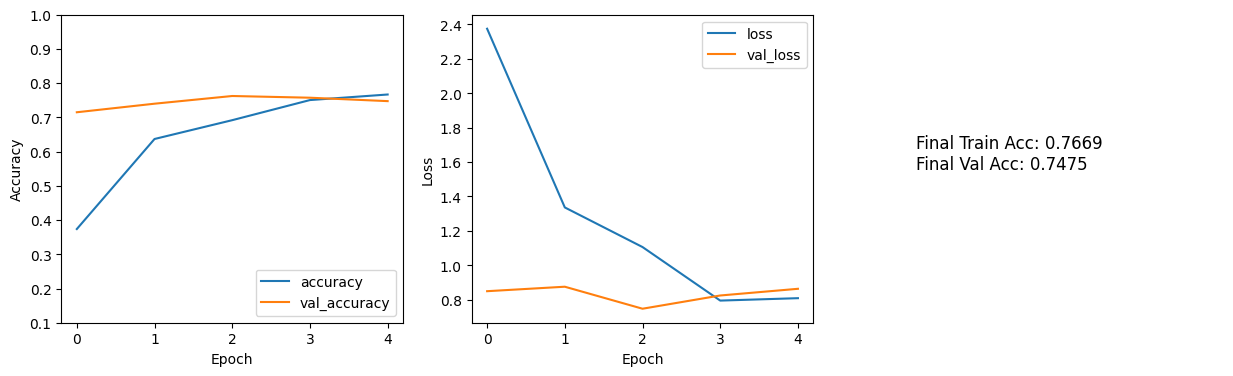

              precision    recall  f1-score   support

           0     0.7561    0.5439    0.6327        57
           1     0.8780    0.8780    0.8780        41
           2     0.8261    0.3725    0.5135        51
           3     0.5082    0.6327    0.5636        49
           4     0.5750    0.5750    0.5750        40
           5     0.5132    0.8125    0.6290        48
           6     0.9286    0.7222    0.8125        54
           7     0.6667    0.7660    0.7129        47
           8     0.7656    0.8596    0.8099        57
           9     0.8966    0.9286    0.9123        56

    accuracy                         0.7100       500
   macro avg     0.7314    0.7091    0.7039       500
weighted avg     0.7382    0.7100    0.7074       500

[[31  2  0  2  1  4  0  3 12  2]
 [ 1 36  0  0  0  0  0  0  1  3]
 [ 3  0 19  9  8  8  1  2  1  0]
 [ 0  0  1 31  2 12  0  3  0  0]
 [ 1  0  1  6 23  1  0  8  0  0]
 [ 0  0  0  5  1 39  1  2  0  0]
 [ 0  0  1  4  3  7 39  0  0  0]
 [ 0  0  1

In [157]:
plot_history(history_4)
eval_model(seqential_model_4, x_test_4, y_test_4)

In [158]:
import tensorflow_datasets as tfds
tf.random.set_seed(42)

def prep(x, y):
    x = tf.cast(x, tf.float32) / 255.0  
    return x, tf.cast(y, tf.int64)

train_ds = (tfds.load("svhn_cropped", split="train[:1600]", as_supervised=True)
            .map(prep).shuffle(1600, seed=42, reshuffle_each_iteration=False)
            .batch(32).prefetch(tf.data.AUTOTUNE))
val_ds   = (tfds.load("svhn_cropped", split="train[1600:2000]", as_supervised=True)
            .map(prep).batch(32).prefetch(tf.data.AUTOTUNE))

test_ds  = (tfds.load("svhn_cropped", split="test[:500]", as_supervised=True)
            .map(prep)
            .batch(32)
            .prefetch(tf.data.AUTOTUNE))

model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_5.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history_5 = model_5.fit(train_ds, epochs=15, validation_data=val_ds, verbose=2, batch_size=32)



Epoch 1/15
50/50 - 3s - 64ms/step - accuracy: 0.1806 - loss: 2.2667 - val_accuracy: 0.2100 - val_loss: 2.2319
Epoch 2/15
50/50 - 1s - 15ms/step - accuracy: 0.1875 - loss: 2.2509 - val_accuracy: 0.2100 - val_loss: 2.2221
Epoch 3/15
50/50 - 1s - 14ms/step - accuracy: 0.1906 - loss: 2.2409 - val_accuracy: 0.2100 - val_loss: 2.2167
Epoch 4/15
50/50 - 1s - 15ms/step - accuracy: 0.2525 - loss: 2.1098 - val_accuracy: 0.3625 - val_loss: 1.8718
Epoch 5/15
50/50 - 1s - 18ms/step - accuracy: 0.4069 - loss: 1.7484 - val_accuracy: 0.4675 - val_loss: 1.5844
Epoch 6/15
50/50 - 1s - 15ms/step - accuracy: 0.5406 - loss: 1.4767 - val_accuracy: 0.5475 - val_loss: 1.3782
Epoch 7/15
50/50 - 1s - 15ms/step - accuracy: 0.5975 - loss: 1.3303 - val_accuracy: 0.6400 - val_loss: 1.2356
Epoch 8/15
50/50 - 1s - 15ms/step - accuracy: 0.6569 - loss: 1.2309 - val_accuracy: 0.6900 - val_loss: 1.1277
Epoch 9/15
50/50 - 1s - 15ms/step - accuracy: 0.6800 - loss: 1.2937 - val_accuracy: 0.6900 - val_loss: 1.4608
Epoch 10/1

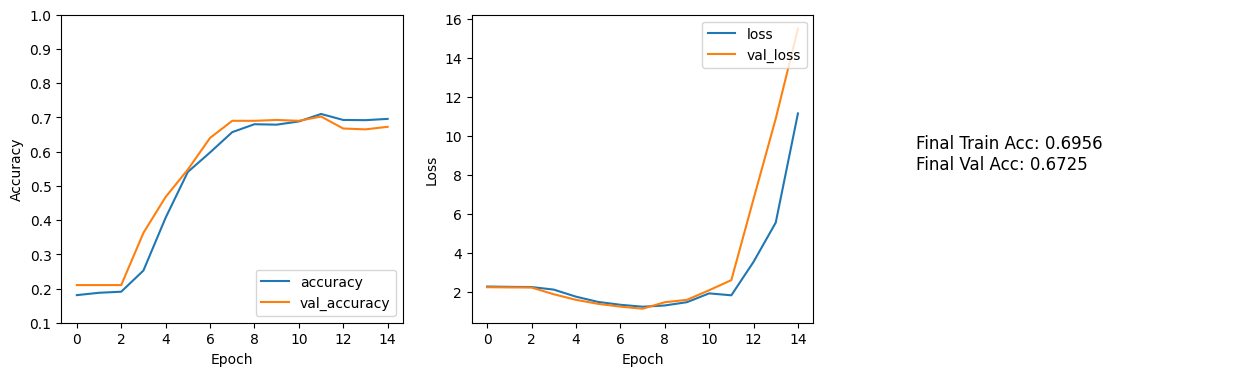

Test accuracy: 0.6400


In [159]:
plot_history(history_5)
test_loss, test_acc = model_5.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


In [160]:
model_6 = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32,32,3)),
        tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.25),             
        tf.keras.layers.Dense(10, activation="softmax"),
    ])

model_6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])


history_6 = model_6.fit(train_ds, epochs=15, verbose=2, validation_data=val_ds)

Epoch 1/15
50/50 - 1s - 18ms/step - accuracy: 0.1769 - loss: 2.2669 - val_accuracy: 0.2100 - val_loss: 2.2275
Epoch 2/15
50/50 - 0s - 8ms/step - accuracy: 0.1906 - loss: 2.2543 - val_accuracy: 0.2100 - val_loss: 2.2258
Epoch 3/15
50/50 - 0s - 10ms/step - accuracy: 0.1869 - loss: 2.2466 - val_accuracy: 0.2100 - val_loss: 2.2276
Epoch 4/15
50/50 - 0s - 9ms/step - accuracy: 0.1919 - loss: 2.2438 - val_accuracy: 0.2100 - val_loss: 2.2236
Epoch 5/15
50/50 - 0s - 8ms/step - accuracy: 0.1900 - loss: 2.2412 - val_accuracy: 0.2100 - val_loss: 2.2241
Epoch 6/15
50/50 - 0s - 8ms/step - accuracy: 0.1912 - loss: 2.2344 - val_accuracy: 0.2100 - val_loss: 2.2192
Epoch 7/15
50/50 - 0s - 8ms/step - accuracy: 0.2000 - loss: 2.2244 - val_accuracy: 0.2100 - val_loss: 2.2038
Epoch 8/15
50/50 - 0s - 8ms/step - accuracy: 0.2075 - loss: 2.2086 - val_accuracy: 0.2100 - val_loss: 2.1810
Epoch 9/15
50/50 - 0s - 9ms/step - accuracy: 0.2194 - loss: 2.1726 - val_accuracy: 0.2175 - val_loss: 2.1456
Epoch 10/15
50/50

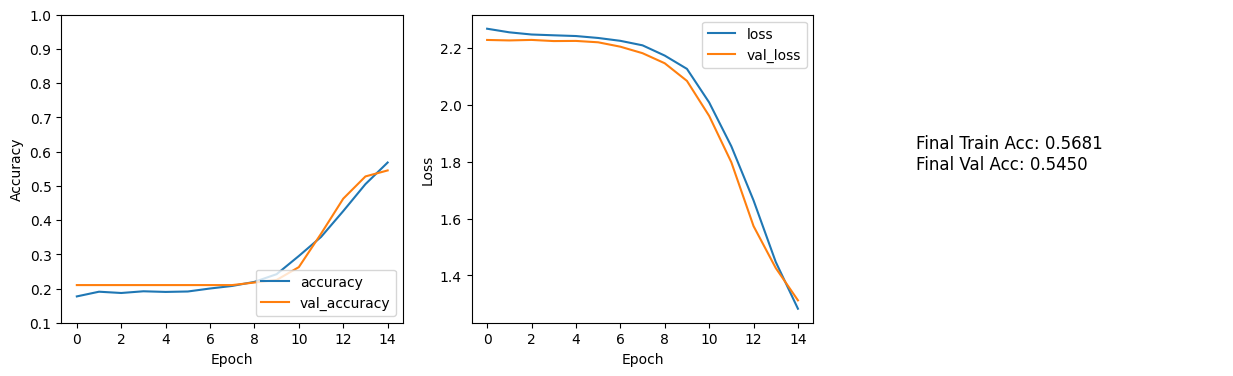

Test accuracy: 0.5400


In [168]:
plot_history(history_6)
test_loss, test_acc = model_6.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

In [ ]:
te = tfds.load("svhn_cropped", split="test[:500]", as_supervised=True, batch_size=-1)
x_test_np, y_test_np = tfds.as_numpy(te)
x_test_np = x_test_np.astype("float32") / 255.0

mc_passes = 20
probs = np.stack(
    [model_6(x_test_np, training=True).numpy() for _ in range(mc_passes)],
    axis=0
) 

probs_mean = probs.mean(axis=0)        
y_pred = probs_mean.argmax(axis=1)
mc_acc = (y_pred == y_test_np).mean()

pred_var = probs.var(axis=0)    
      
epi_unc = pred_var.mean(axis=1).mean() 

print(f"MC acc: {mc_acc:.4f}")
print(f"Avg epistemic uncertainty: {epi_unc:.3f}")

MC acc: 0.4700
Avg epistemic uncertainty: 0.003
